In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import pyarrow as pa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
parquet_file = pq.ParquetFile("/content/drive/MyDrive/QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet")

In [4]:
parquet_file.metadata

  created_by: parquet-cpp version 1.3.1-SNAPSHOT
  num_columns: 4
  num_rows: 36272
  num_row_groups: 36272
  format_version: 1.0
  serialized_size: 14143781

In [5]:
metadata = pq.read_metadata("/content/drive/MyDrive/QCDToGGQQ_IMGjet_RH1all_jet0_run0_n36272.test.snappy.parquet")
metadata.row_group(0)

  num_columns: 4
  num_rows: 1
  total_byte_size: 4665

In [6]:
parquet_file.read_row_group(0)

pyarrow.Table
X_jets: list<item: list<item: list<item: double>>>
  child 0, item: list<item: list<item: double>>
      child 0, item: list<item: double>
          child 0, item: double
pt: double
m0: double
y: double
----
X_jets: [[[[[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0],...,[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0]],[[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0],...,[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0]],[[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0],...,[0,0,0,0,0,...,0,0,0,0,0],[0,0,0,0,0,...,0,0,0,0,0]]]]]
pt: [[112.41109466552734]]
m0: [[21.098247528076172]]
y: [[0]]

In [3]:
file_1 = next(parquet_file.iter_batches(batch_size = 8000, columns=['X_jets', 'y'])) 
df = pa.Table.from_batches([file_1]).to_pandas()
del file_1

X_dataset = np.array(np.array(np.array(df['X_jets'].tolist()).tolist()).tolist())
y_dataset = df['y'].to_numpy()

del df

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, GlobalAveragePooling2D, AveragePooling2D, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=35)

In [6]:
X_train = np.moveaxis(X_train, 1, -1)
X_test = np.moveaxis(X_test, 1, -1)
X_val = np.moveaxis(X_val, 1, -1)

In [7]:
tf.random.set_seed(42)

model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(125, 125, 3)),
  Conv2D(32, (3,3), activation='relu'),
  MaxPool2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (3,3), activation='relu'),
  Conv2D(64, (3,3), activation='relu'),
  MaxPool2D((2,2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, batch_size=32,
                        epochs=10,
                        validation_data=(X_val, y_val)
                        )

Epoch 1/10
180/180 [==============================] - 14s 45ms/step - loss: 0.6334 - accuracy: 0.6623 - val_loss: 0.6158 - val_accuracy: 0.6734
Epoch 2/10
180/180 [==============================] - 7s 41ms/step - loss: 0.5847 - accuracy: 0.7083 - val_loss: 0.5871 - val_accuracy: 0.6891
Epoch 3/10
180/180 [==============================] - 8s 42ms/step - loss: 0.5444 - accuracy: 0.7373 - val_loss: 0.5854 - val_accuracy: 0.6891
Epoch 4/10
180/180 [==============================] - 8s 42ms/step - loss: 0.4811 - accuracy: 0.7703 - val_loss: 0.6292 - val_accuracy: 0.7094
Epoch 5/10
180/180 [==============================] - 8s 42ms/step - loss: 0.3838 - accuracy: 0.8313 - val_loss: 0.7880 - val_accuracy: 0.6875
Epoch 6/10
180/180 [==============================] - 7s 42ms/step - loss: 0.2575 - accuracy: 0.8972 - val_loss: 0.8945 - val_accuracy: 0.6734
Epoch 7/10
180/180 [==============================] - 7s 42ms/step - loss: 0.2179 - accuracy: 0.9262 - val_loss: 1.2347 - val_accuracy: 0.643

In [8]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

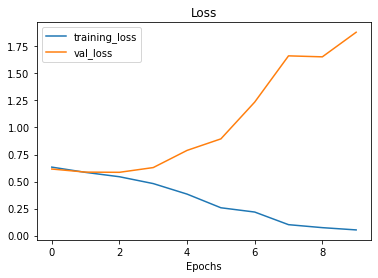

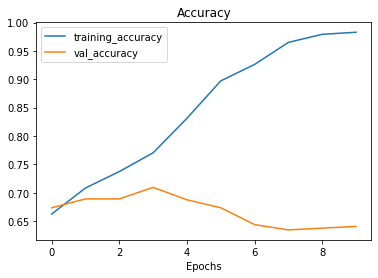

In [9]:
plot_loss_curves(history)

In [10]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

50/50 [==============================] - 1s 12ms/step - loss: 1.8943 - accuracy: 0.6469
Loss = 1.8942736387252808
Test Accuracy = 0.6468750238418579


In [11]:
y_pred = model.predict(X_test)
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {score:.4f}")

50/50 [==============================] - 1s 9ms/step
ROC AUC: 0.6993
